In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist/manga.csv
/kaggle/input/myanimelist/anime.csv


# Proyecto de Analitica Descriptiva

## Definicion de un proyecto de Analítica descriptiva

## (1) Problema a resolver:

Haciendo uso de una base de datos creada usando la informacion de una pagina para listar y puntuar animes, peliculas, novelas ligeras y mangas por parte de la comunidad hispana hablante ya que se centra en traduccir o subtitular estas obras ademas contiene informacion relevante sobre la mism. Veremos la repercucion de este hobby en la comunidad a lo largo del tiempo, como a ido creciendo la cantidad de obras que llegan a este lado de la comunidad y cuales resultan mas atrayentes para los lectores.

## (2) Objetivos:

2.1 Con base en la información obtendremos la data más representativa y que más se relaciona con la demás información.
2.2 Cuál es el género con mayor aceptación en cada año y ver como ha ido cambiando a lo largo del tiempo.

2.3 Analizar las condiciones sobre las cuales las obras son canceladas y buscar alguna similitud que lleve a una obra a ser cancelada.

2.4 Cuáles son las obras con mejor calificación tanto audiovisuales como escrita y como dieren las condiciones para ser consideradas las mejores.

2.5 Como la cantidad de espectadores influye en otros aspectos de la obra así como su alcance.

## (3) Datos:

a. Fuentes de datos:

La data fue recogida de la pagina MyAnimeList que se encuentra disponible en Kaggle y esta hasta actualizada hasta el año 2023 y fue tomada en consideracion ya que contiene gran catidad de datos relevantes asi como una diferenciacion entre obra audio visuales (anime, peliculas anime, DVD/VHS) y obras en formato escrito(mangas, novelas ligeras, novelas)

b. Tipos de datos

En la data consta formato string para nombre de la obra, descripciones, autores etc. tambien hay formatos float e int para puntuaciones, numero de capitulos o volumenes, etc. y por ultimo formato fecha para conocer los años de publicacion, finalizacion o adaptacion. 

**c. Procesamineto**

 Haciendo uso la herramienta kaggle como el lenguaje en Phyton se realizara el procesamiento de la data 

## Subida y limpierza de la base

In [3]:
dfmanga = pd.read_csv("/kaggle/input/myanimelist/manga.csv")
dfmanga.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaN,...,"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],True
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaN,...,"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,...,"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,...,"[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,...,"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True


Eliminar columnas redundates o que no se necesitan

In [5]:
dfmanga.dtypes

manga_id               int64
title                 object
type                  object
score                float64
scored_by              int64
status                object
volumes              float64
chapters             float64
start_date            object
end_date              object
members                int64
favorites              int64
sfw                     bool
approved                bool
created_at_before     object
updated_at            object
real_start_date       object
real_end_date         object
genres                object
themes                object
demographics          object
authors               object
serializations        object
synopsis              object
background            object
main_picture          object
url                   object
title_english         object
title_japanese        object
title_synonyms        object
jikan                   bool
dtype: object

In [7]:
columnas_eliminar_manga = ['manga_id', 'updated_at', 'authors', 'synopsis', 'background','main_picture','url','title_english','title_japanese', 'title_synonyms']

In [8]:
dfmanga = dfmanga.drop(columnas_eliminar_manga, axis=1)

Cambiar el valor [] por el valor NULL para evitar problemas de interpretacion en la base de datos

In [11]:
dfmanga = dfmanga.replace('[]', None)

In [13]:
dfmanga.isnull().sum()

title                    0
type                     0
score                45363
scored_by                0
status                   0
volumes              16779
chapters             20178
start_date            4324
end_date             15552
members                  0
favorites                0
sfw                      0
approved                 0
created_at_before        0
real_start_date       4324
real_end_date        15552
genres                3163
themes               43624
demographics         40292
serializations       26197
jikan                    0
dtype: int64

In [15]:
dfmanga2 = dfmanga.dropna()
dfmanga2.isnull().sum()

title                0
type                 0
score                0
scored_by            0
status               0
volumes              0
chapters             0
start_date           0
end_date             0
members              0
favorites            0
sfw                  0
approved             0
created_at_before    0
real_start_date      0
real_end_date        0
genres               0
themes               0
demographics         0
serializations       0
jikan                0
dtype: int64

**Analizar la cantidad de obras estrenadas por cada ano y agruparlas por los generos**

In [17]:
dfmanga2.dtypes

title                 object
type                  object
score                float64
scored_by              int64
status                object
volumes              float64
chapters             float64
start_date            object
end_date              object
members                int64
favorites              int64
sfw                     bool
approved                bool
created_at_before     object
real_start_date       object
real_end_date         object
genres                object
themes                object
demographics          object
serializations        object
jikan                   bool
dtype: object

In [18]:
print(dfmanga2.columns)

Index(['title', 'type', 'score', 'scored_by', 'status', 'volumes', 'chapters',
       'start_date', 'end_date', 'members', 'favorites', 'sfw', 'approved',
       'created_at_before', 'real_start_date', 'real_end_date', 'genres',
       'themes', 'demographics', 'serializations', 'jikan'],
      dtype='object')


In [47]:
dfmanga2['real_start_date'] = pd.to_datetime(dfmanga2['real_start_date'], errors='coerce')
dfmanga2['year'] = dfmanga2['real_start_date'].dt.year

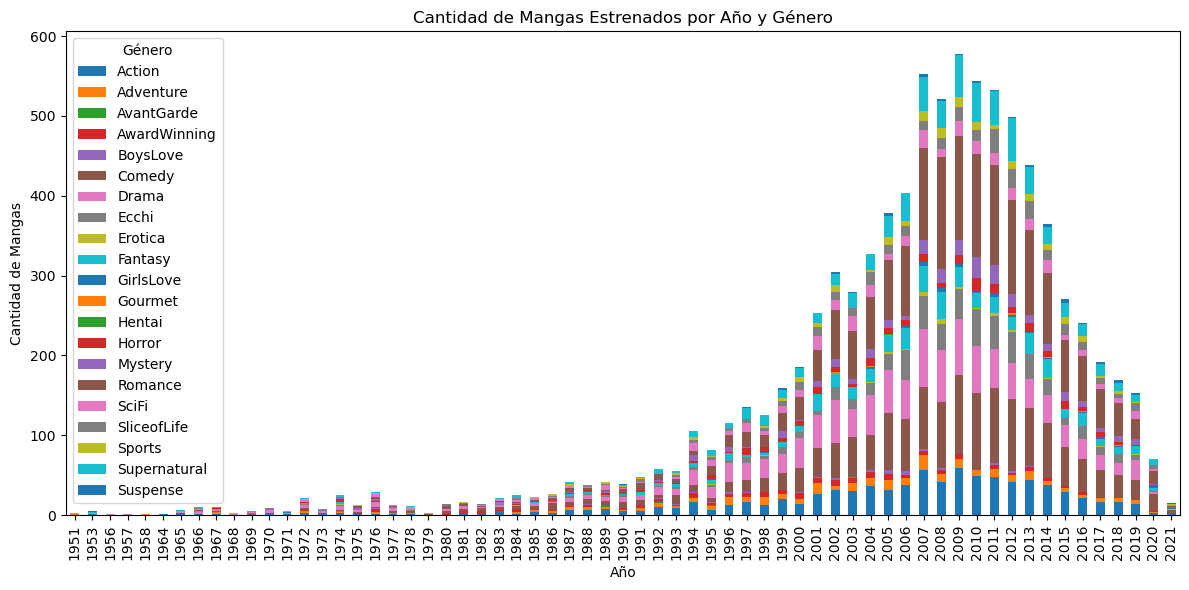

In [58]:
import matplotlib.pyplot as plt
manga_por_ano_genero = dfmanga2.groupby(['year', 'genres']).size().unstack()
manga_por_ano_genero.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Año')
plt.ylabel('Cantidad de Mangas')
plt.title('Cantidad de Mangas Estrenados por Año y Género')
plt.legend(title='Género')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
dfmanga2['genres'] = dfmanga2['genres'].str.split(',')

dfmanga2 = dfmanga2.explode('genres')
dfmanga2['year'] = pd.to_numeric(dfmanga2['year'], errors='coerce')
manga_por_ano_genero = dfmanga2.groupby(['year', 'genres']).size()

print("Cantidad de mangas estrenados por año y género:")
manga_por_ano_genero.tail(30)

Cantidad de mangas estrenados por año y género:


year  genres      
2019  Romance         25
      SciFi           10
      SliceofLife     10
      Sports           1
      Supernatural     9
      Suspense         2
2020  Action           3
      Adventure        1
      AwardWinning     1
      Comedy          22
      Drama            2
      Ecchi            1
      Fantasy          4
      GirlsLove        3
      Horror           1
      Mystery          1
      Romance         16
      SciFi            3
      SliceofLife      5
      Supernatural     7
2021  Action           3
      Comedy           3
      Drama            1
      Erotica          1
      GirlsLove        1
      Mystery          1
      Romance          2
      SciFi            1
      Sports           1
      Suspense         1
dtype: int64

**Obtener la media del score en base a el genero de animes y mangas**

In [51]:
filtered_df = dfmanga2[dfmanga2['score'] != 0]
mean_std_by_genres = filtered_df.groupby('genres')['score'].agg(['mean', 'std']).sort_values('mean', ascending=True)
print("Mean and standard deviation of 'score' by genres (excluding 0 values):")
print(mean_std_by_genres)

Mean and standard deviation of 'score' by genres (excluding 0 values):
                  mean       std
genres                          
AvantGarde    6.416667  0.123423
Hentai        6.600000       NaN
Ecchi         6.811341  0.508788
Erotica       6.849143  0.548267
GirlsLove     6.984583  0.451258
Horror        7.109360  0.690343
Romance       7.112549  0.500716
Comedy        7.117350  0.530252
Supernatural  7.130841  0.574222
Action        7.146172  0.591233
SciFi         7.157486  0.602820
Fantasy       7.166018  0.541793
Sports        7.205795  0.594638
BoysLove      7.220238  0.656270
Mystery       7.227600  0.617556
Adventure     7.289922  0.567955
Drama         7.310238  0.602356
SliceofLife   7.328624  0.566388
Suspense      7.330417  0.669509
Gourmet       7.512308  0.449614
AwardWinning  7.889554  0.540933


In [38]:
dfmanga2['genres'].unique()

array(['Action', 'Adventure', 'AwardWinning', 'Drama', 'Fantasy',
       'Horror', 'Mystery', 'Supernatural', 'SliceofLife', 'Suspense',
       'Sports', 'SciFi', 'Comedy', 'Ecchi', 'Romance', 'GirlsLove',
       'Gourmet', 'Erotica', 'BoysLove', 'AvantGarde', 'Hentai'],
      dtype=object)

In [66]:
dfmanga2['scored_by']

2        143879
2        143879
2        143879
2        143879
2        143879
          ...  
21898       107
21905       102
21905       102
21905       102
21905       102
Name: scored_by, Length: 8642, dtype: int64

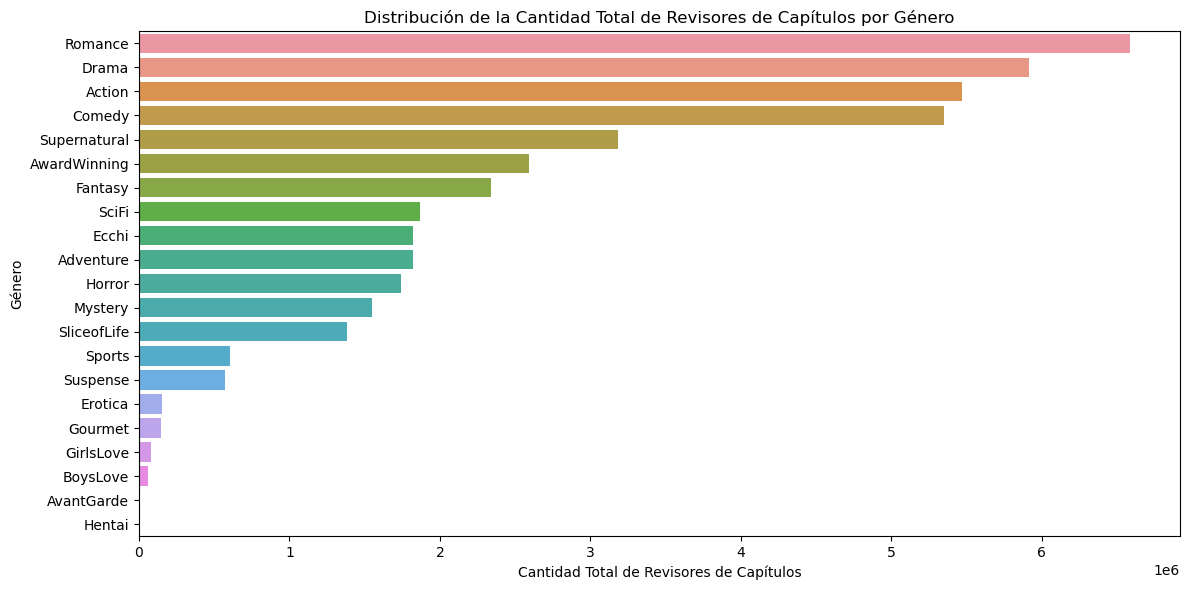

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

genero_cantidad_revisores = dfmanga2.groupby('genres')['scored_by'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genero_cantidad_revisores.values, y=genero_cantidad_revisores.index)

plt.xlabel('Cantidad Total de Revisores de Capítulos')
plt.ylabel('Género')
plt.title('Distribución de la Cantidad Total de Revisores de Capítulos por Género')

plt.tight_layout()
plt.show()

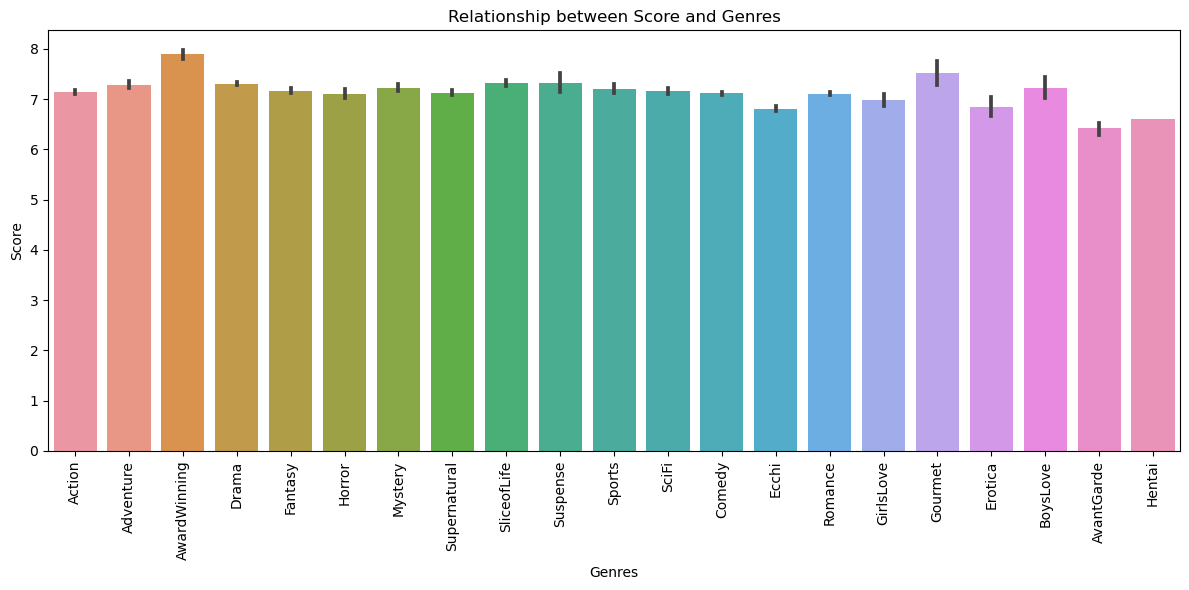

In [45]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.barplot(data=dfmanga2, x='genres', y='score')  # Create the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.xlabel('Genres')  # Set the label for the x-axis
plt.ylabel('Score')  # Set the label for the y-axis
plt.title('Relationship between Score and Genres')  # Set the title of the plot
plt.tight_layout()  # Adjust the layout
plt.show()  # Show the plot

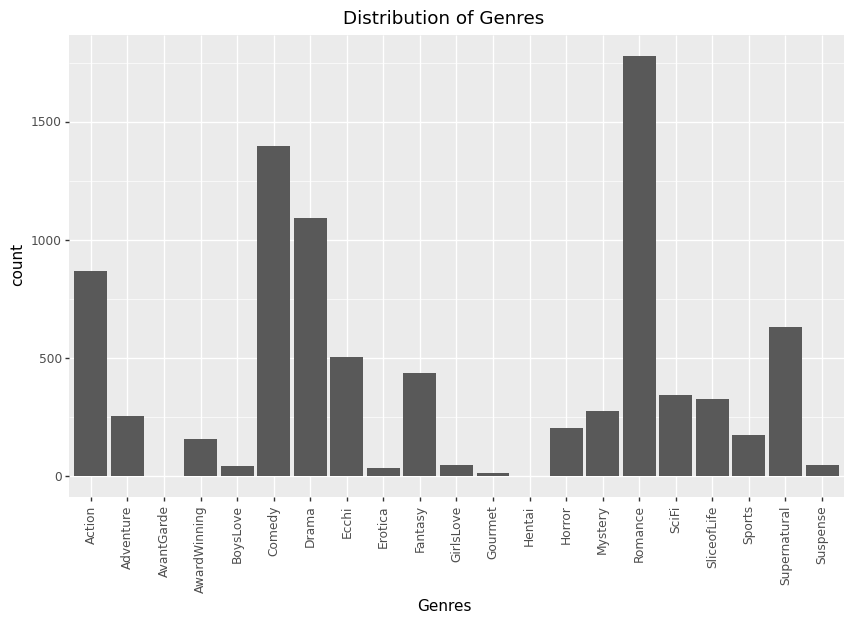

In [52]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, labs

plot = (
    ggplot(dfmanga2, aes(x='genres')) +
    geom_bar() +
    theme(axis_text_x=element_text(angle=90)) +
    labs(x='Genres', title='Distribution de catidad de obras por genero')
)
plot = plot + theme(figure_size=(10, 6))
print(plot)

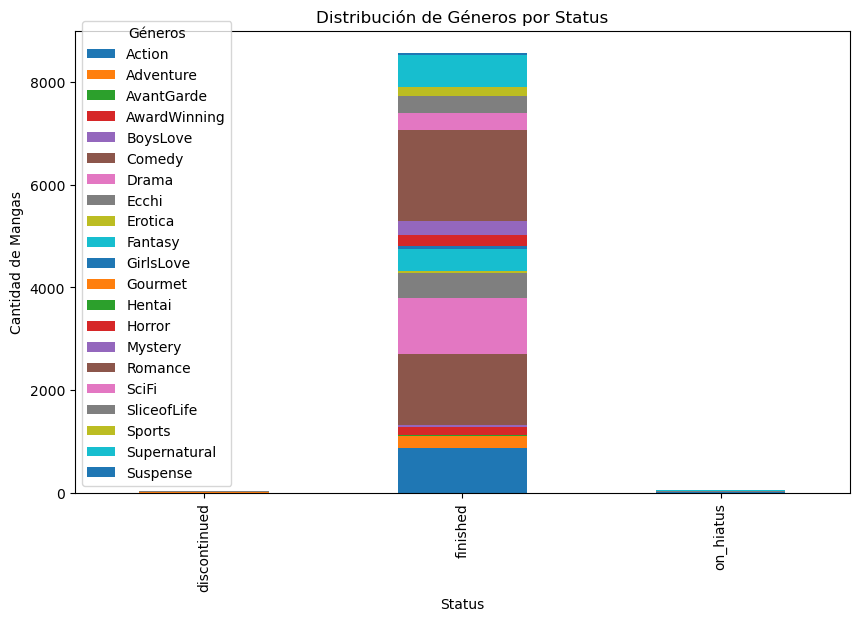

In [62]:
import matplotlib.pyplot as plt

grupo_status_genero = dfmanga2.groupby(['status', 'genres']).size().unstack()

grupo_status_genero.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Status')
plt.ylabel('Cantidad de Mangas')
plt.title('Distribución de Géneros por Status')
plt.legend(title='Géneros')

plt.show()

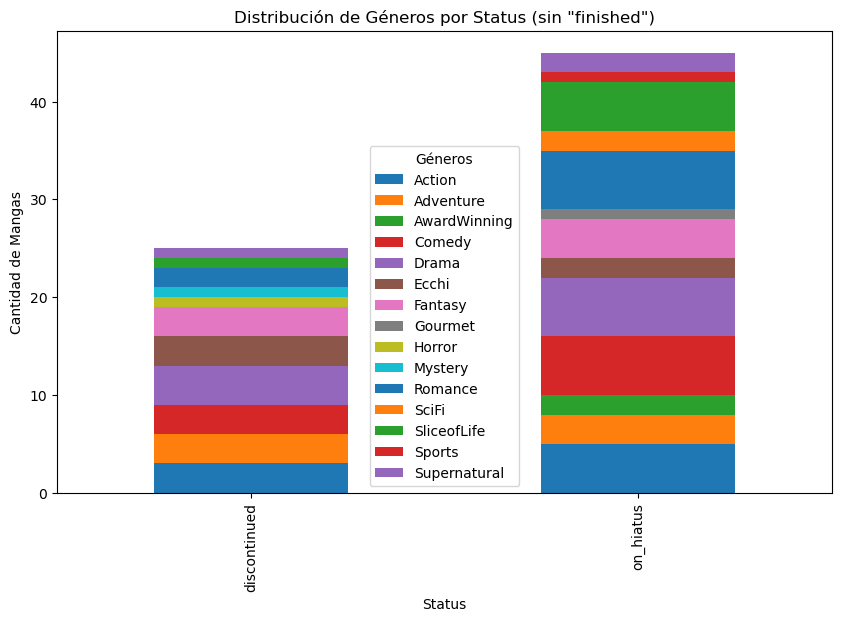

In [57]:
import matplotlib.pyplot as plt

df_filtered = dfmanga2[dfmanga2['status'] != 'finished']

grupo_status_genero = df_filtered.groupby(['status', 'genres']).size().unstack()

grupo_status_genero.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Status')
plt.ylabel('Cantidad de Mangas')
plt.title('Distribución de Géneros por Status (sin "finished")')
plt.legend(title='Géneros')

plt.show()

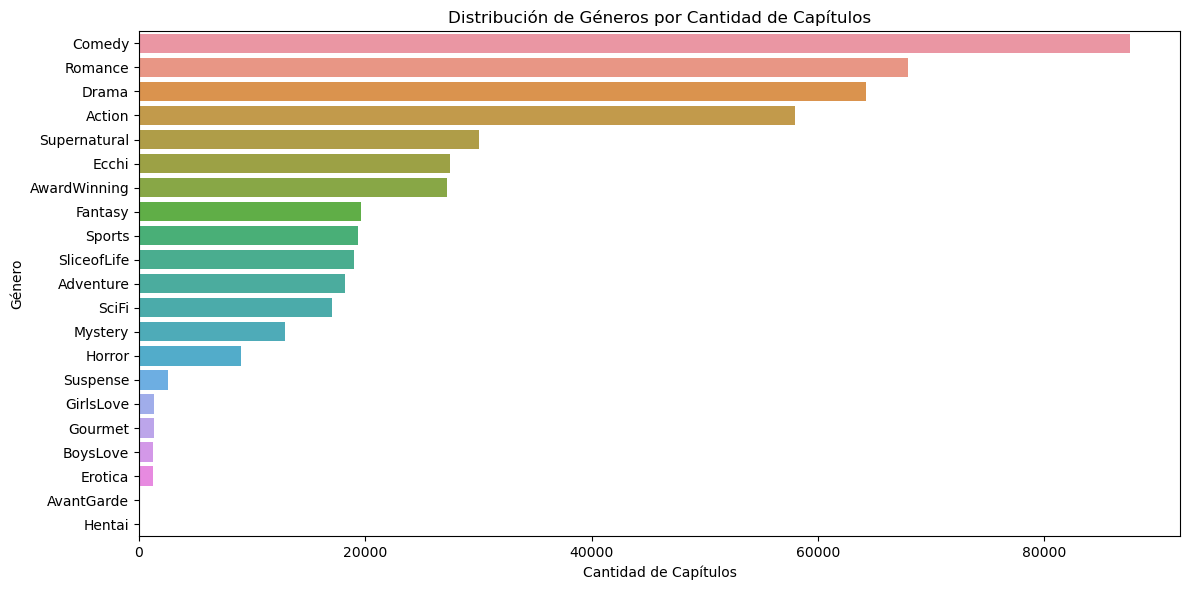

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

genero_cantidad_capitulos = dfmanga2.groupby('genres')['chapters'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genero_cantidad_capitulos.values, y=genero_cantidad_capitulos.index)

plt.xlabel('Cantidad de Capítulos')
plt.ylabel('Género')
plt.title('Distribución de Géneros por Cantidad de Capítulos')

plt.tight_layout()
plt.show()

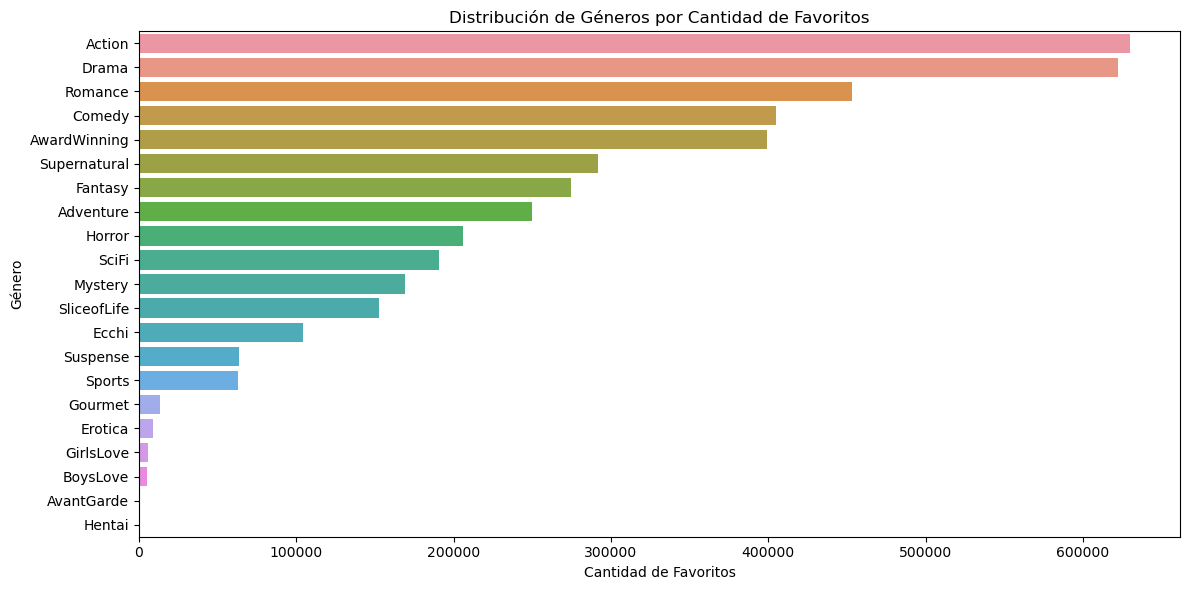

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

genero_cantidad_favoritos = dfmanga2.groupby('genres')['favorites'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genero_cantidad_favoritos.values, y=genero_cantidad_favoritos.index)

plt.xlabel('Cantidad de Favoritos')
plt.ylabel('Género')
plt.title('Distribución de Géneros por Cantidad de Favoritos')

plt.tight_layout()
plt.show()
